Tarefas:
1. Escolha uma base de dados.  
2. Implemente a Regressão Linear Múltipla.  
3. Calcule:  
a) R-squared.  
b) F-statistic.  
c) Calcule os coeficientes da regressão.  
d) Exemplifique o cálculo de uma predição, com dados que estão na base de teste, ou com dados estipulados por você.   
e) Procure mostrar graficamente os resultados, quando possível.  


In [290]:
#importanto bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

Utilizarei o dataset, onde analisarei quantidas de vendas de algumas empresas em relação ao seu investimento em algumas plataformas de marketing, como o youtube e facebook.

In [291]:
#lendo o dataset
df = pd.read_csv("Marketing_Data.csv", header=0)
print(df.shape)

#Separando as variáveis dependentes e independentes do nosso modelo
x = df[['youtube', 'facebook']]
y=df.loc[:,'sales']

(171, 4)


Para fazer a escolha das variáveis que vão aparecer no modelo vamos fazer a plotagem de alguns desses dados para verificar se apresenta linearidade. 

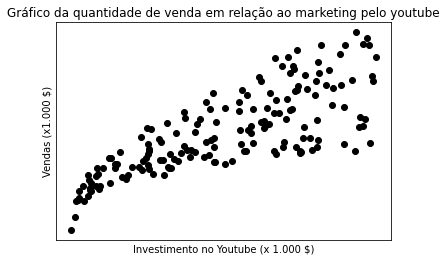

In [292]:
#Gráfico em relação ao youtube
plt.scatter(x.loc[:,'youtube'].values, y.values,  color='black')
plt.xticks(())
plt.yticks(())
plt.title("Gráfico da quantidade de venda em relação ao marketing pelo youtube")
plt.xlabel("Investimento no Youtube (x 1.000 $)")
plt.ylabel("Vendas (x1.000 $)")
plt.show()

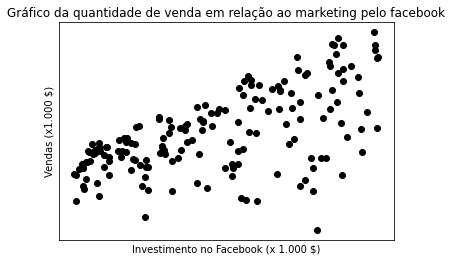

In [293]:
#Gráfico em relação ao facebook
plt.scatter(x.loc[:,'facebook'].values, y.values,  color='black')
plt.xticks(())
plt.yticks(())
plt.title("Gráfico da quantidade de venda em relação ao marketing pelo facebook")
plt.xlabel("Investimento no Facebook (x 1.000 $)")
plt.ylabel("Vendas (x1.000 $)")
plt.show()

Vamos separar o dataset entre amostras de treino e teste

In [294]:
#Separando entre dados de teste e dados de treino
x_train, x_test, y_train, y_test = train_test_split(x, y)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(128, 2) (128,) (43, 2) (43,)


Regressão Linear utilizando a biblioteca do SKLearn

In [295]:
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Fazendo a predição de dados utilizando a regressão encontrada pelo SKLearn

In [296]:
y_pred = regr.predict(x_test)
print(y_pred)


[15.61674724 14.4105754  16.08923593  9.09028509 17.42556697 17.15729823
 18.38674106 11.14705766 19.81562961  5.20788255  6.757485   23.37721212
 16.40402388  8.98305529 10.07134105 16.89645872 19.81182255 14.31067035
 18.70997767 10.96066738 19.77088935 15.17968615 25.81523132 17.84924177
 14.94064009 22.24669511 10.91733501 22.54367617 21.9401589   7.24658165
 20.29773774 12.74961191 22.3551131  21.68352566 15.21024707 22.37757901
 20.95570177 20.83598451  5.24634157  8.78650706 19.68926005 28.2810881
 29.33371321]


Regressão Linear utilizando o StatsModel

In [297]:
x_train = sm.add_constant(x_train) 
model = sm.OLS(y_train.astype(float), x_train.astype(float)).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     595.4
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           1.28e-64
Time:                        21:15:12   Log-Likelihood:                -270.67
No. Observations:                 128   AIC:                             547.3
Df Residuals:                     125   BIC:                             555.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2961      0.439      7.510      0.0

Fazendo a predição de dados utilizando a regressão encontrada pelo StatsModel

In [298]:
x_test = sm.add_constant(x_test)
y_pred =  model.predict(x_test) # predict out of sample
print(y_pred)

86     15.616747
87     14.410575
138    16.089236
3       9.090285
91     17.425567
131    17.157298
56     18.386741
22     11.147058
84     19.815630
47      5.207883
31      6.757485
104    23.377212
93     16.404024
5       8.983055
103    10.071341
106    16.896459
11     19.811823
105    14.310670
125    18.709978
0      10.960667
66     19.770889
67     15.179686
64     25.815231
81     17.849242
130    14.940640
121    22.246695
96     10.917335
159    22.543676
30     21.940159
77      7.246582
33     20.297738
97     12.749612
112    22.355113
140    21.683526
21     15.210247
164    22.377579
45     20.955702
139    20.835985
62      5.246342
141     8.786507
19     19.689260
118    28.281088
69     29.333713
dtype: float64


Por fim, printando todos os dados pedidos:

In [304]:
print("R-squared: ", model.rsquared)
print("F-statisc: ", model.fvalue, "\n")

print("Dados retirados pelo SKLearn: ")
print("Beta 0, 1, 2: ", regr.intercept_, regr.coef_)
print("Coeficiente de determinação: ", r2_score(y_test, y_pred),)
print("Erro quadrático médio: ", mean_squared_error(y_test, y_pred), "\n")

print("Dados retirados pelo StatsModel: ")
print("Beta 0, 1, 2 (Coef):\n", model.params)



R-squared:  0.9050009740864347
F-statisc:  595.4014826622059 

Dados retirados pelo SKLearn: 
Beta 0, 1, 2:  3.2960861563511408 [0.04669514 0.19315465]
Coeficiente de determinação:  0.8773480275542308
Erro quadrático médio:  3.8619404939043678 

Dados retirados pelo StatsModel: 
Beta 0, 1, 2 (Coef):
 const       3.296086
youtube     0.046695
facebook    0.193155
dtype: float64


Podemos perceber que existe uma concordância entre os resultados utilizando ambos os métodos, é um indicativo da consistência das análises